Name: M M Satya Sai Varma

OASIS INTERNSHIP TASK 1

# IRIS FLOWER CLASSIFICATION

The Iris flower data set or Fisher’s Iris data set is one of the most famous multivariate data set used for testing various Machine Learning Algorithms.Iris flower has three species namely setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

**Given the measurements of Sepal Width, Sepal length, Petal length and Petal width of all three categories.. We have to classify them based on their measurements.

# Steps

1. Importing requried libraries
2. Loading of dataset
3. Display Summary Statistics
4. Data Visualization                                                                                                
5. Data Modelling
6. Prediction of species

Importing requried libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

Loading of dataset

In [2]:
df = pd.read_csv("C:/Users/satya/Downloads/Iris.csv")

Display Summary Statistics

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Data Visualization

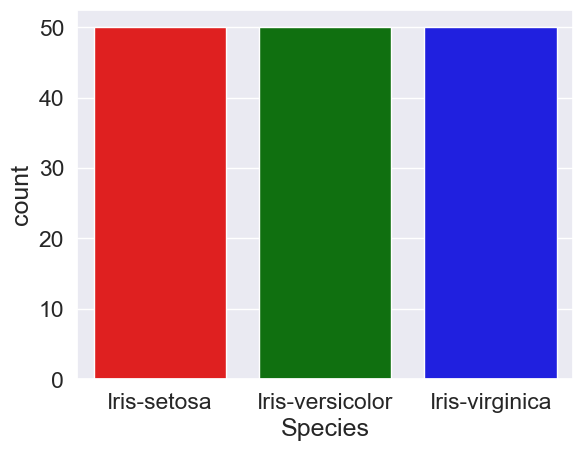

In [11]:
sns.countplot(x='Species', data=df,palette=["red", "green", "blue"])
plt.show()

Text(0, 0.5, 'frequency')

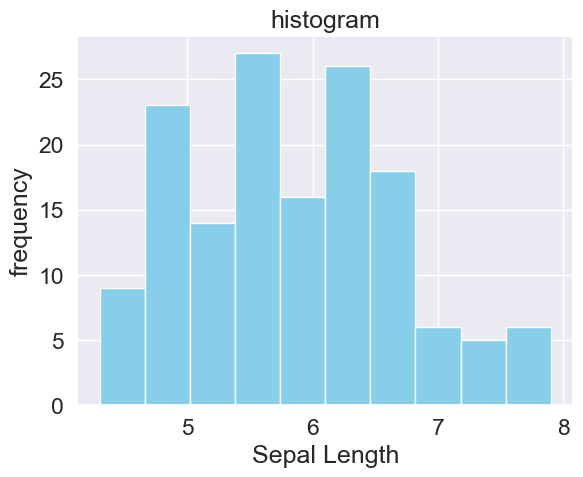

In [12]:
plt.hist(df['SepalLengthCm'],color='skyblue')
plt.title("histogram")
plt.xlabel("Sepal Length")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

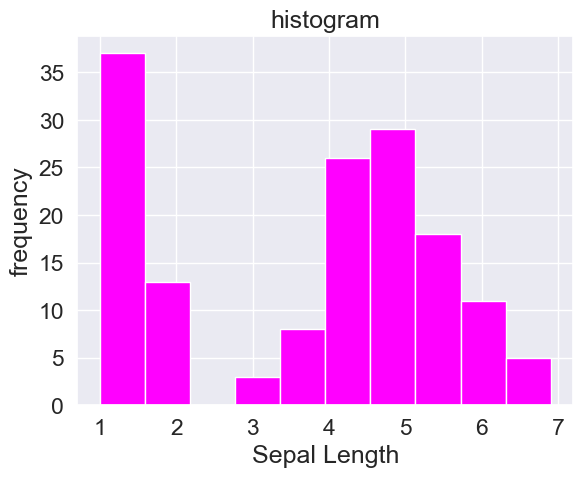

In [13]:
plt.hist(df['PetalLengthCm'],color = 'magenta')
plt.title("histogram")
plt.xlabel("Sepal Length")
plt.ylabel("frequency")


Text(0, 0.5, 'frequency')

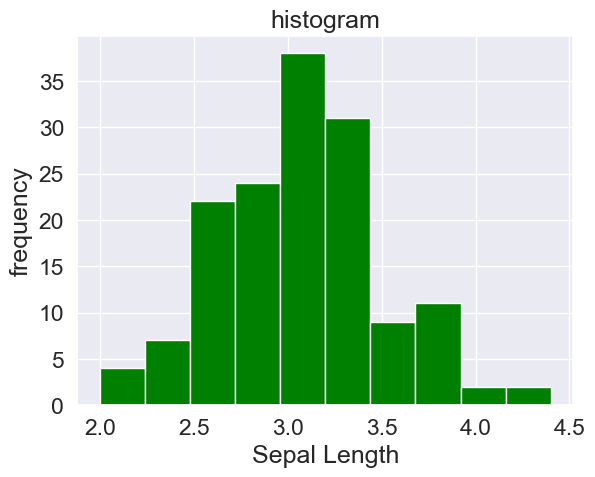

In [14]:
plt.hist(df['SepalWidthCm'],color='green')
plt.title("histogram")
plt.xlabel("Sepal Length")
plt.ylabel("frequency")


Text(0, 0.5, 'frequency')

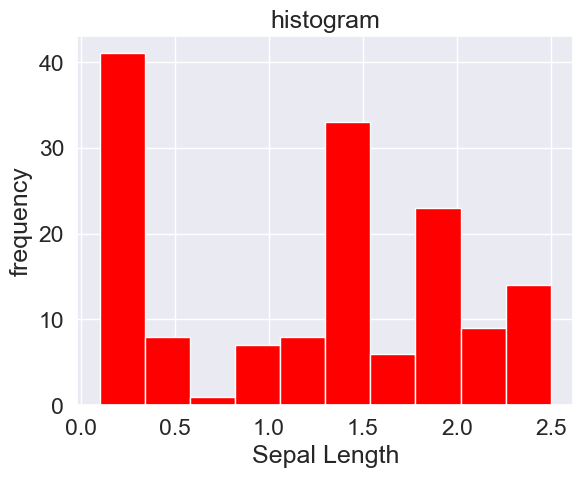

In [15]:
plt.hist(df['PetalWidthCm'],color='red')
plt.title("histogram")
plt.xlabel("Sepal Length")
plt.ylabel("frequency")

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

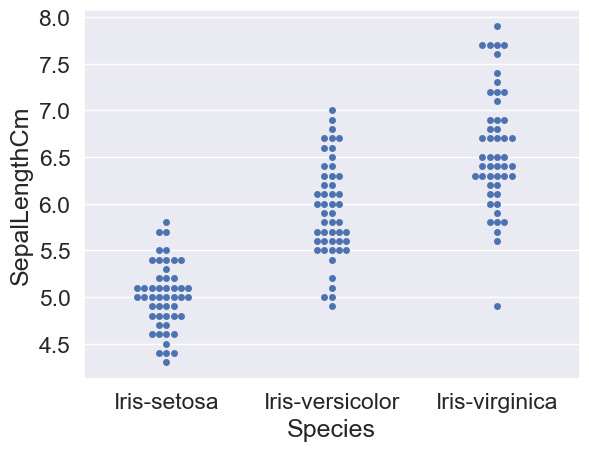

In [16]:
sns.swarmplot(x='Species',y='SepalLengthCm',data=df)

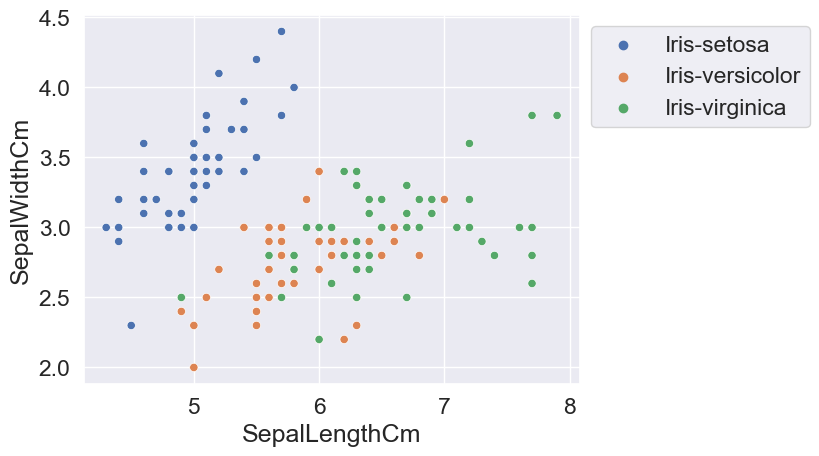

In [17]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#To display the plot
plt.show()

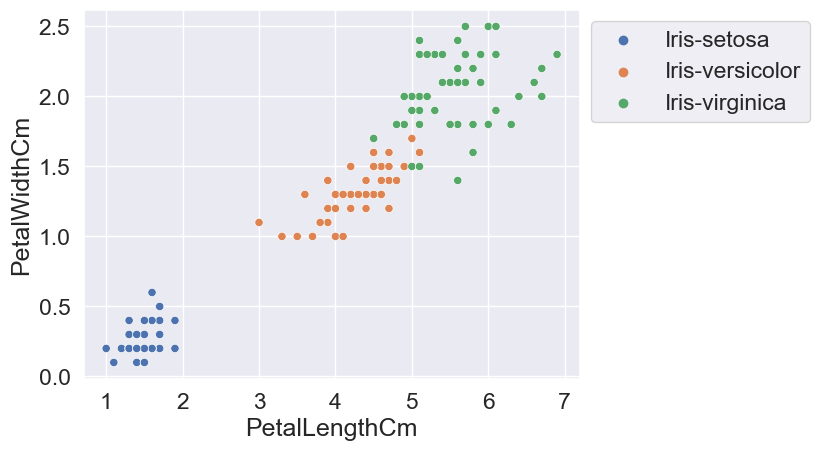

In [18]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#To display the plot
plt.show()

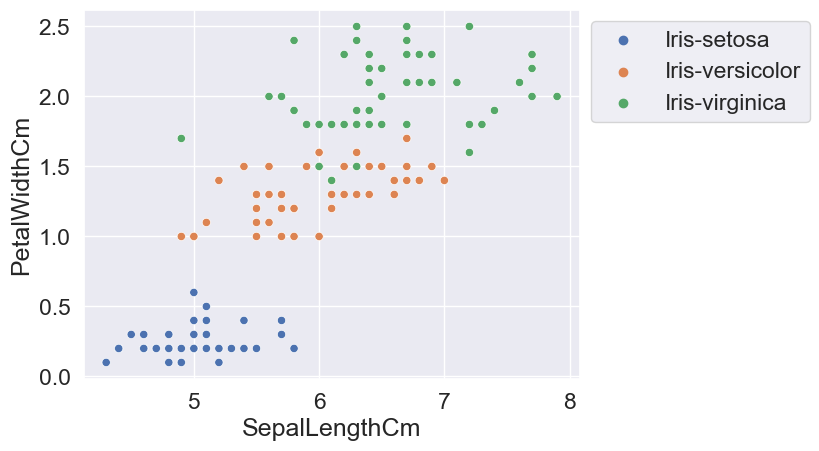

In [19]:
sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', hue='Species', data=df, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#To display the plot
plt.show()

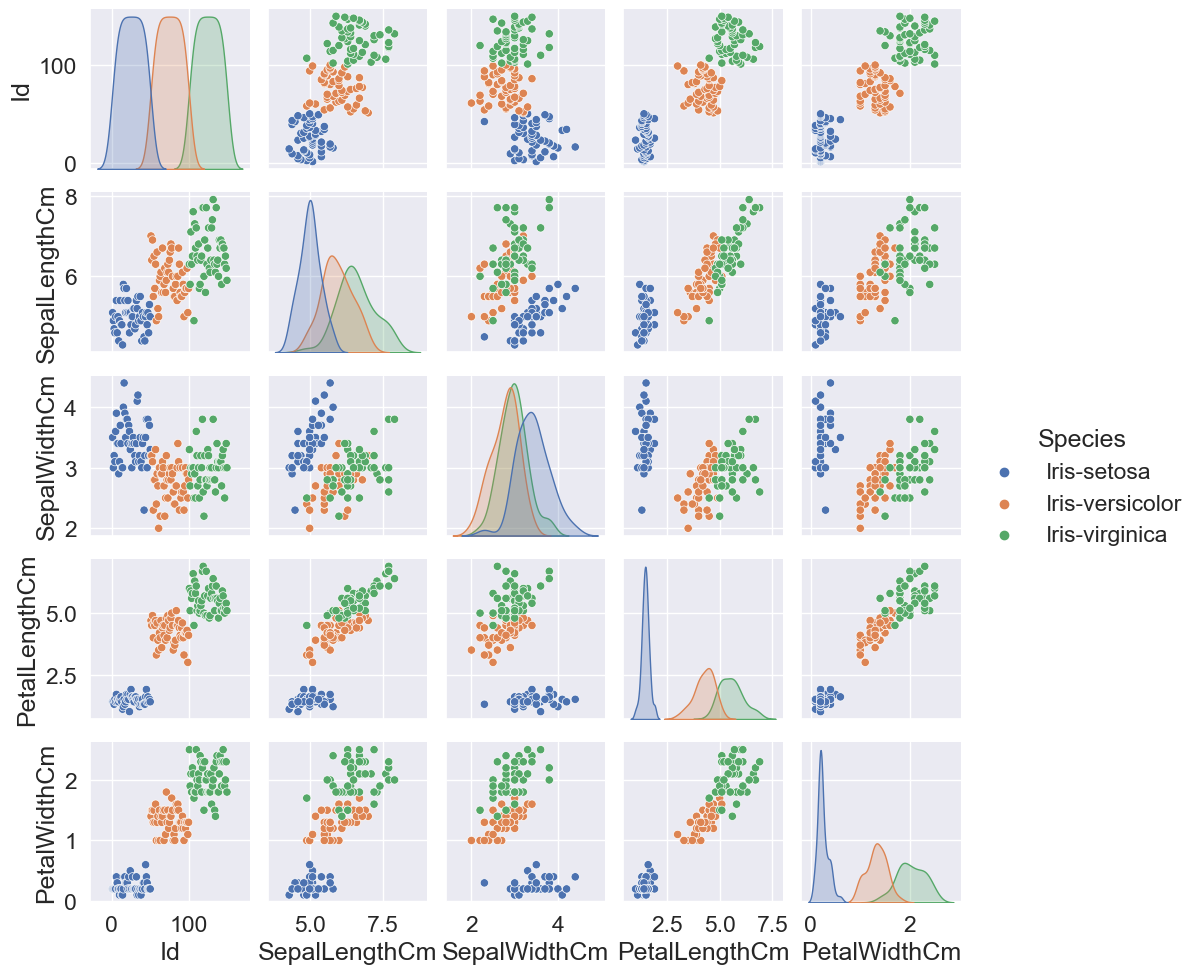

In [20]:
sns.pairplot(df,hue='Species', height=2)

In [21]:
x = df.drop(columns=["Species","Id"])
y = df["Species"]


Data Modelling

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
print(x_train.shape,y_train.shape)


(120, 4) (120,)


In [24]:
print(x_test.shape,y_test.shape)


(30, 4) (30,)


In [25]:
clf = LogisticRegression()

In [26]:
clf.fit(x_train,y_train)

LogisticRegression()

In [27]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

In [28]:
print("Accuraacy on Training Data is: ",accuracy_score(y_train,train_pred)*100)

Accuraacy on Training Data is:  97.5


In [29]:
print("Accuracy on Tetsing Data is:",accuracy_score(y_test,test_pred)*100)

Accuracy on Tetsing Data is: 100.0


In [30]:
cm = confusion_matrix(y_test,test_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

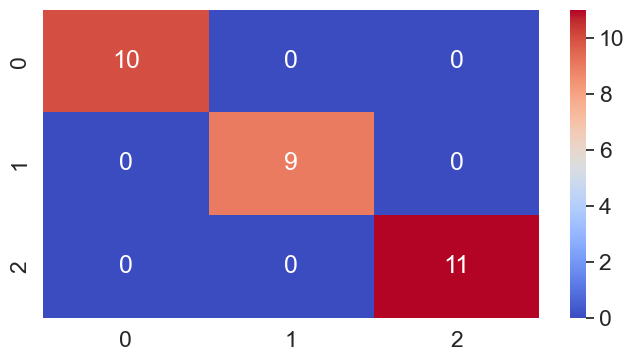

In [31]:
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="g",cmap="coolwarm")
plt.show()

Thank you!!!